In [1]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from utilsCPD import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_multilabel_classification
import pandas as pd

Let $X_1,...X_t$ be independet rv with $0\leq X_i \leq b_{i}$ a.s. and consider $S_{t}=X_1+...+X_{t}$.
We know that $P(|S_t-E[S_n]| \geq t) \leq 2\exp{(-\frac{2t^{2}}{\sum_{i=1}^{t}b_{i}^{2}})}$

Can we find $P(|S_{t+1}-E[S_{t+1}]|\geq t|S_{t})$

In [419]:
def cond_hoef(Ft,p):
    c_t = np.mean(abs(Ft[0]))
    t = (-1*np.log(p/2)*2*(2*c_t**2))**0.5
    return t

def cond_hoef()

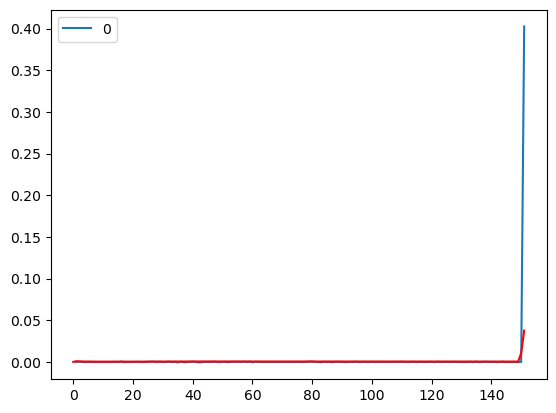

In [475]:
BOUND = [cond_hoef(df.diff().iloc[1:n],0.05) for n in range(2,len(df))]
n=152
fig,ax = plt.subplots()
df.iloc[:n].diff().plot(ax=ax)
ax.plot(BOUND[:n],color='red')

In [516]:
(np.array(BOUND[1:10]) - df.iloc[1:10].to_numpy()).diagonal()

array([ 0.0001001 , -0.00051059, -0.0004298 , -0.00039294, -0.00043667,
       -0.00050402, -0.00041112, -0.00035493, -0.00033084])

In [403]:
cond_hoef(df.diff().iloc[1:450],0.05)

1.5093562283318855

In [395]:
abs(df.diff()).iloc[1:15].mean()[0]

0.43430656

In [384]:
df.diff()

,0
0,NaN
1,-0.095044
2,0.076791
3,0.637450
4,-0.419249
...,...
1446,1.063143
1447,-0.261395
1448,0.006887
1449,0.102182


In [348]:
(-np.log(0.05)*4*loss_segments[0].mean()**2)**0.5

35.92537234217316

In [149]:
for vala, valb in zip(df.cumsum(),CB_upper):
    if vala > valb:
        print(val)

In [429]:
data = make_blobs(2000,10,random_state=0,cluster_std=0.1,centers=10,center_box=(-2,2))

<Axes: >

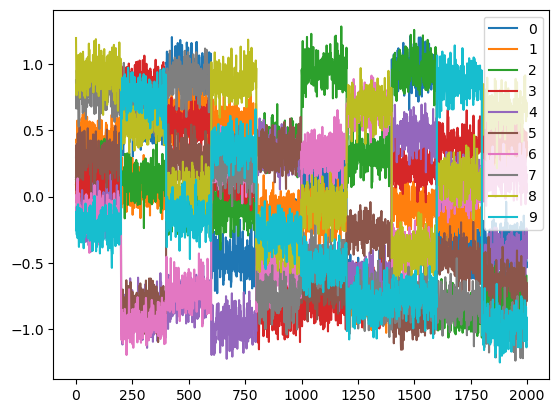

In [426]:
df_samples = pd.DataFrame((data[0]))
df_samples['target'] = data[1][:,np.newaxis]
df_sequential = df_samples.sort_values(by=['target']).reset_index(drop=True).iloc[:,:-1].astype('float32')
df_sequential.plot()

In [422]:
d= 100
mu = np.zeros(d)
mu[0] = 0
mu[1] = 0


COV = np.eye(d)
COV[0,0] = 3
COV[1,1] = 5

COV2 = COV.copy()
COV2[2,2] = 2
COV2[0,0] = 1
df_sequential = pd.DataFrame(np.vstack((np.random.multivariate_normal(np.zeros(d),np.eye(d),size=500),np.random.multivariate_normal(mu,COV,size=500),np.random.multivariate_normal(mu,COV2,size=500)))).astype('float32')

df_sequential.head()



,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.825232,0.347331,0.435341,-1.372912,0.170487,0.056970,0.103781,0.520188,-0.044839,-1.640764,...,-0.139678,-0.142880,0.980929,-0.949534,1.747269,1.354230,-1.252390,0.312832,-1.473633,0.868849
1,-0.373495,0.099969,1.726519,-0.491815,-0.750515,-0.696006,0.864328,-1.058090,-1.598381,0.318103,...,1.479233,-0.749863,-1.082595,-2.301445,0.027958,-0.107709,0.979800,-1.308651,1.168062,0.441369
2,0.370259,-1.106441,0.351662,-0.803828,1.513601,0.732886,-1.228897,0.128171,-0.543626,0.258834,...,0.471719,1.815112,1.693334,-0.667598,-0.682142,0.471551,-0.419045,0.936969,0.093497,-1.552263
3,0.609661,-1.711585,-1.458697,-0.936127,-1.488455,0.320870,-0.245841,0.663606,0.371181,-1.037643,...,-0.144870,0.454120,0.273503,-1.254877,0.382670,0.372016,0.197540,-0.929969,-1.666337,0.908629
4,0.181083,0.113734,1.093229,-0.871371,-0.395560,-0.989371,0.063510,0.576307,-0.125682,0.081360,...,-0.058739,0.349188,-0.370362,-0.251077,0.131234,0.649188,-1.170811,-0.510849,0.552047,-0.676444


In [79]:
df_sequential.to_csv('df_out_syn.csv')

In [215]:
np.linalg.norm(df_sequential.iloc[:20],axis=1).max()

0.87084585

In [80]:
def plot_statistic(ax,data,ax2):
    c = 0
    for key in data:
        segment = data[key]
        if c == 0:
            ax2.plot(np.arange(segment['t0'],segment['t1'],1),segment['SWDs'],color='black',lw=1.0,label='SWD')
            ax.plot(np.arange(segment['t0'],segment['t1'],1),segment['statistic'],color='blue',lw=1.5,label='Test statstic')
        else: 
            ax2.plot(np.arange(segment['t0'],segment['t1'],1),segment['SWDs'],color='black',lw=1.0)
            ax.plot(np.arange(segment['t0'],segment['t1'],1),segment['statistic'],color='blue',lw=1.5)
        ax.plot(np.arange(segment['t0']-1,segment['t1'],1),segment['lower'],color='blue',lw=1,alpha=0.5)
        ax.plot(np.arange(segment['t0']-1,segment['t1'],1),segment['upper'],color='blue',lw=1,alpha=0.5)
        ax.fill_between(np.arange(segment['t0']-1,segment['t1'],1),segment['upper'],segment['lower'],color='blue',alpha=0.2)
        c+=1

    return ax

 25%|██▍       | 481/1951 [00:00<00:01, 1084.25it/s]

Change Alarm at iteration 67
Change Alarm at iteration 176
Change Alarm at iteration 230
Change Alarm at iteration 292
Change Alarm at iteration 353
Change Alarm at iteration 387
Change Alarm at iteration 433
Change Alarm at iteration 474


 47%|████▋     | 911/1951 [00:00<00:00, 1594.55it/s]

Change Alarm at iteration 576
Change Alarm at iteration 628
Change Alarm at iteration 705
Change Alarm at iteration 745
Change Alarm at iteration 776
Change Alarm at iteration 828
Change Alarm at iteration 976
Change Alarm at iteration 1030


 78%|███████▊  | 1517/1951 [00:01<00:00, 1795.04it/s]

Change Alarm at iteration 1176
Change Alarm at iteration 1230
Change Alarm at iteration 1376
Change Alarm at iteration 1429
Change Alarm at iteration 1536
Change Alarm at iteration 1576


100%|██████████| 1951/1951 [00:01<00:00, 1401.87it/s]

Change Alarm at iteration 1629
Change Alarm at iteration 1776
Change Alarm at iteration 1829
1.4237518310546875


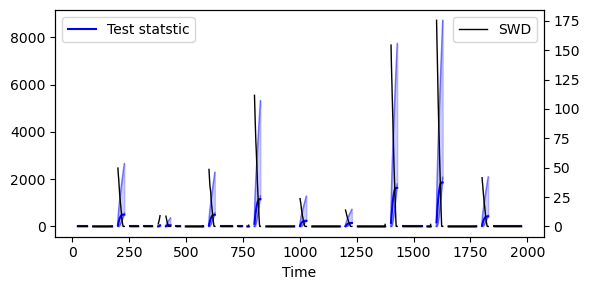

In [81]:
from tqdm import tqdm
import time
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device = 'cpu'
LENGHT = 50
train_dataloader_ts = DataLoader(TimeseriesDataset(df_sequential.to_numpy(),LENGHT,split=0.5))
SWDs = []
test_stat = []
calibrated = False
t = 0
skip_count = 0  # To track the number of skipped iterations
segmentation ={}
segments=0
t0=int(LENGHT*0.5)-1
begin = time.time()
loss_segments = []
THETA = sample_theta_torch(df_sequential.to_numpy(), 1000)
for i, d in enumerate(tqdm(train_dataloader_ts)):
    # Skip iterations if `skip_count` is active
    if skip_count > 0:
        skip_count -= 1
        continue

    x_ref, x_cur = d[0].squeeze(0).to(device), d[1].squeeze(0).to(device)
    #THETA = sample_theta_torch(x_ref, 5000)
    #print(THETA.dtype)
    loss = project_and_calc_dist_torch(x_ref, x_cur, THETA, p=4, device=device).sum(axis=0).detach().cpu().numpy()
    loss_segments.append(loss)
    SWDs.append(loss.mean())
    #test_stat.append(calc_statistic(0.05,x_cur.detach().cpu().numpy()))
    # Calibration phase
    if not calibrated:
        alpha_hat, beta_hat = mom_estimates(loss)
        #print('Calibration at {}'.format(i+LENGHT))
        #print(f"Calibration: alpha={alpha_hat}, beta={beta_hat}")
        calibrated = True
        lower_CI = [0]
        upper_CI = [0]
        cumsum = loss.mean()
        t = 1 
        #last_cal = 0 

    # Monitoring phase
    if calibrated:
        #last_cal += 1 
        l, u = gamma_conf_interval(t, alpha_hat, 1 / beta_hat, 0.90)
        lower_CI.append(l)
        upper_CI.append(u)
        cumsum += loss.mean()
        t += 1

        # Check if a change point is detected
        if cumsum >= u or cumsum <= l:
            print(f"Change Alarm at iteration {i + int(LENGHT*0.5)}")
            #print(mom_estimates(loss))
            #print(mom_estimates(np.hstack(loss_segments)))
            
            segmentation[segments] = {'t0':t0,'t1':i+int(LENGHT*0.5),'statistic':np.cumsum(SWDs),'lower':lower_CI,'upper':upper_CI,'SWDs':SWDs}
            calibrated = False  # Reset calibration
            cumsum = 0
            t = 0
            skip_count = int(LENGHT*0.5)  # Skip the next 15 iterations
            SWDs = []
            segments+=1
            t0=i+LENGHT
            
        
segmentation[segments] = {'t0':t0,'t1':i+int(LENGHT*0.5),'statistic':np.cumsum(SWDs),'lower':lower_CI,'upper':upper_CI,'SWDs':SWDs}
end = time.time()
print(end-begin)

fig, ax = plt.subplots(figsize=(6,3))
ax2 = ax.twinx()
plot_statistic(ax,segmentation,ax2)
ax.legend()
ax2.legend()
ax.set_xlabel('Time')
fig.tight_layout()

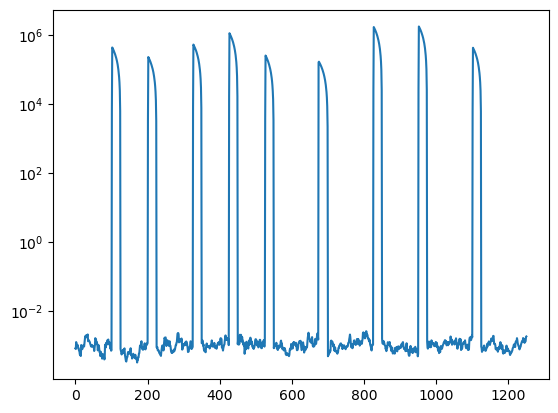

In [88]:
plt.plot([l.mean() for l in loss_segments])
plt.plot(test_stat)
plt.yscale('log')
#plt.axhline(2/np.sqrt(LENGHT/2))
#plt.axhline(2*(LENGHT/2)**(-1/4))
#plt.axhline(22.2)

  0%|          | 0/1951 [00:00<?, ?it/s]

100%|██████████| 1951/1951 [00:01<00:00, 1227.61it/s]


<Axes: >

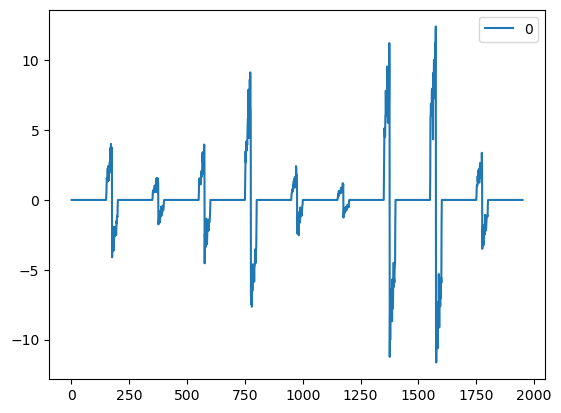

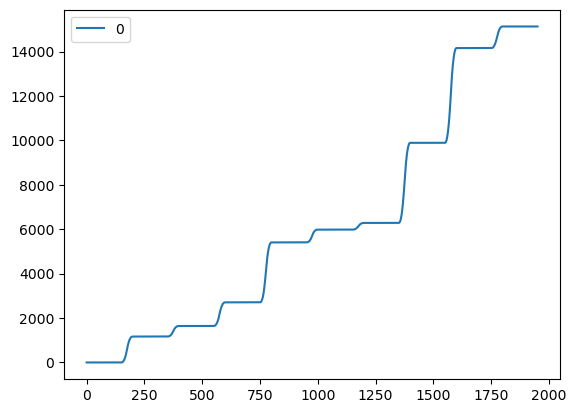

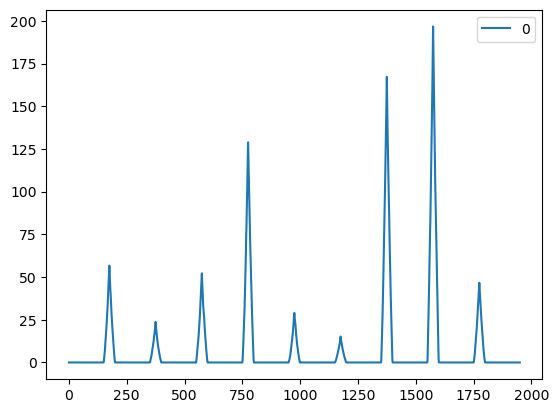

In [480]:
loss_segments = []
alphas= []
betas =[]
test_stat = []
prop5_stat = []
LENGHT = 50
train_dataloader_ts = DataLoader(TimeseriesDataset(df_sequential.to_numpy(),LENGHT,split=0.5))
THETA = sample_theta_torch(df_sequential.to_numpy(), 5000)
X_REF = []
for i, d in enumerate(tqdm(train_dataloader_ts)):
    #THETA = sample_theta_torch(df_sequential.to_numpy(), 10000)
    x_ref, x_cur = d[0].squeeze(0).to(device), d[1].squeeze(0).to(device)
    #X_REF.append(x_ref)
    loss = project_and_calc_dist_torch(x_ref, x_cur, THETA, p=4, device=device).sum(axis=0).detach().cpu().numpy()
    loss_segments.append(loss)

    a_hat, b_hat = mom_estimates(loss)#mom_estimates(np.vstack(loss_segments))
   # a_hat, b_hat = estimate_parameter_CI(np.vstack(loss_segments),0.05)
    alphas.append(a_hat)
    betas.append(b_hat)
    #test_stat.append(calc_statistic(0.05,x_cur.detach().cpu().numpy()))
    #prop5_stat.append(prop5(x_cur.detach().cpu().numpy(),x_ref.detach().cpu().numpy(),p=4,m=5000))
    #SWDs.append(loss.mean())
df = pd.DataFrame([l.mean() for l in loss_segments])
df.diff().plot()
df.cumsum().plot()
df.plot()

In [481]:
def get_var(df):
    a,b = estimate_parameter_CI(df.to_numpy(),0.05)
    return 2*(a[1]/b[0]**2)**0.5

varbound_lower = []
varbound_upper = []
start_ind = 0
skip_count = 0
cps = []
new_seg = []
for i in range(2,len(loss_segments)):
    if skip_count >0:
        skip_count-=1
        varbound_lower.append(0)
        varbound_upper.append(0)

        
        continue
    a,b = estimate_parameter_CI(np.vstack(loss_segments[start_ind:i]),0.05)
    

    bound_var = 2*(a[0]/b[1]**2)**0.5
    if bound_var >= loss_segments[i].mean():

        varbound_lower.append(bound_var)
        varbound_upper.append(2*(a[1]/b[0]**2)**0.5)
    else:
        cps.append(i)
        skip_count = 50
        varbound_lower.append(0)
        varbound_upper.append(0)
        start_ind = i + skip_count
        new_seg.append(start_ind)
        print(start_ind)
    

201
401
601
801
1001
1201
1401
1601
1801


In [497]:
start_ind = 0
skip_count = 0
cps_hoeff = []
new_seg_hoeff = []
hoeff_bound = []
diffs_segments = [abs(loss_segments[0].mean()-loss_segments[1].mean())]

def hoefding(diffs,p):
    c_t = np.mean(diffs)
    t = (-1*np.log(p/2)*2*(2*c_t**2))**0.5
    return t

for i in range(2,len(loss_segments)):
    if skip_count >0:
        skip_count-=1
        if skip_count == 1:
           diffs_segments = [abs(loss_segments[i].mean()-loss_segments[i-1].mean())]
        hoeff_bound.append(0)
        continue
    #a,b = estimate_parameter_CI(np.vstack(loss_segments[start_ind:i]),0.05)
    
    bound = hoefding(diffs_segments,0.05)
    print(bound)

    
    if bound >= abs(loss_segments[i].mean()-loss_segments[i-1].mean()):

        hoeff_bound.append(bound)
        diffs_segments.append(abs(loss_segments[i].mean()-loss_segments[i-1].mean()))

    else:
        cps.append(i)
        skip_count = 50
        hoeff_bound.append(0)
        start_ind = i + skip_count
        new_seg.append(start_ind)
        #print(start_ind)
        print(i)
        diffs_segments = []
    

0.00014866938530982266
2
7.637296255601755e-05
53
0.00026175200019509884
0.00013275591055839032
0.0002001423382172842
0.00016200089686832367
0.00018683757392040228
0.0001601445474749278
0.00015881760939771714
110
9.335078698725347
9.103064677174384
7.876743968222043
8.225044330278859
8.056707413065284
8.41573770010904
8.687197658764171
8.808815075861776
8.971657897821283
9.510269726437578
9.612678416437532
10.096276025698637
9.966155994775603
10.070400018479367
10.12119681682356
10.385777937430134
10.704171701633717
10.612060662415011
10.762312582298687
10.84818953143664
10.682220964002532
10.68912361376581
10.83198108039372
10.792572692531996
10.817063041121594
10.772846518556777
10.74541450736407
10.638214167694288
10.58195899166811
10.475332880657156
10.38835418179581
10.319532831243702
10.233825311614334
10.219548356969286
10.180589644181698
10.057651592752311
9.960808433150582
9.822997218372963
9.685794118155888
9.560916327811997
9.366272960843828
9.143272589149595
8.9306422192159

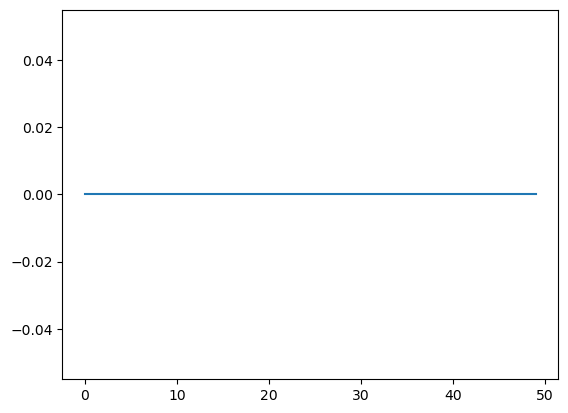

In [496]:
fig,ax = plt.subplots()
ax.plot(hoeff_bound[:50])
#df.diff().iloc[:50].plot(ax=ax)

In [446]:
import numpy as np
import matplotlib.pyplot as plt

def plot_segments(ax, t, cps, new_seg, varbound_lower, varbound_upper, color='red', alpha=0.3):
    """
    Plots segments with changepoints and fills the bounds between varbound_lower and varbound_upper.

    Parameters:
        ax : matplotlib.axes.Axes
            The matplotlib axis object to plot on.
        t : array-like
            The time array corresponding to the data.
        cps : list
            A list of changepoints indices.
        new_seg : list
            A list of starting indices for new segments after waiting 50 values.
        varbound_lower : list or array-like
            The lower bound values for the variable.
        varbound_upper : list or array-like
            The upper bound values for the variable.
        color : str, optional
            The color for the plots and shaded areas (default is 'red').
        alpha : float, optional
            The alpha transparency for the shaded area (default is 0.3).

    Returns:
        None
    """
    # Plot the first segment

    if cps == []:
        ax.plot(t, np.array(varbound_lower), color=color)
        ax.plot(t, np.array(varbound_upper), color=color)
        ax.fill_between(t, 
                    np.array(varbound_lower), 
                    np.array(varbound_upper), 
                    alpha=alpha, color=color)
        return 0 
    ax.plot(t[:cps[0]-2], np.array(varbound_lower)[:cps[0]-2], color=color)
    ax.plot(t[:cps[0]-2], np.array(varbound_upper)[:cps[0]-2], color=color)
    ax.fill_between(t[:cps[0]-2], 
                    np.array(varbound_lower)[:cps[0]-2], 
                    np.array(varbound_upper)[:cps[0]-2], 
                    alpha=alpha, color=color)

    # Loop over subsequent segments
    for i in range(len(new_seg)):
        if i < len(cps) - 1:  # Handle intermediate segments
            start = new_seg[i]
            end = cps[i + 1] - 2
            ax.plot(t[start:end], np.array(varbound_lower)[start:end], color=color)
            ax.plot(t[start:end], np.array(varbound_upper)[start:end], color=color)
            ax.fill_between(t[start:end], 
                            np.array(varbound_lower)[start:end], 
                            np.array(varbound_upper)[start:end], 
                            alpha=alpha, color=color)
        else:  # Handle the last segment
            start = new_seg[i]
            ax.plot(t[start:], np.array(varbound_lower)[start:], color=color)
            ax.plot(t[start:], np.array(varbound_upper)[start:], color=color)
            ax.fill_between(t[start:], 
                            np.array(varbound_lower)[start:], 
                            np.array(varbound_upper)[start:], 
                            alpha=alpha, color=color)


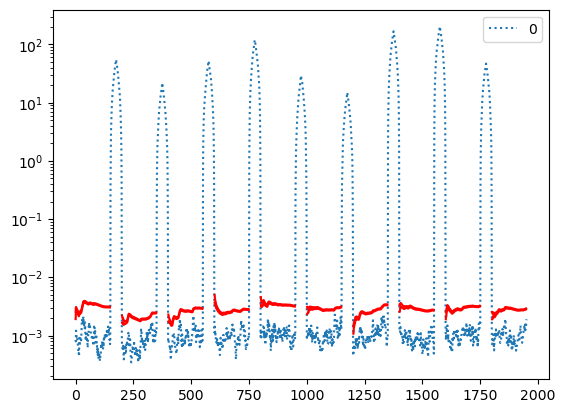

In [449]:
df = pd.DataFrame([l.mean() for l in loss_segments])
fig,ax = plt.subplots()
df.plot(ax=ax,linestyle='dotted')
ax.set_yscale('log')

t = np.array(range(len(varbound_upper)))

plot_segments(ax,t,cps,new_seg,varbound_lower,varbound_upper)

<Axes: >

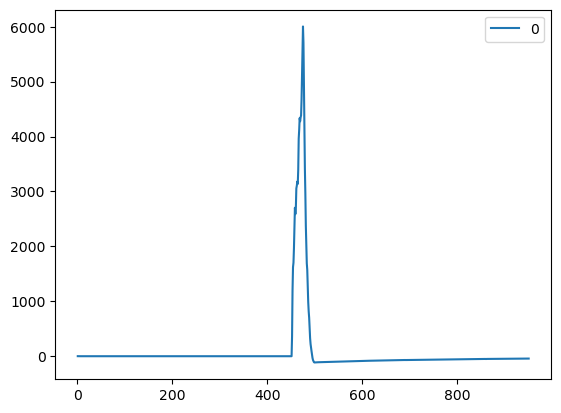

In [568]:
pd.DataFrame(varbound).diff().plot()

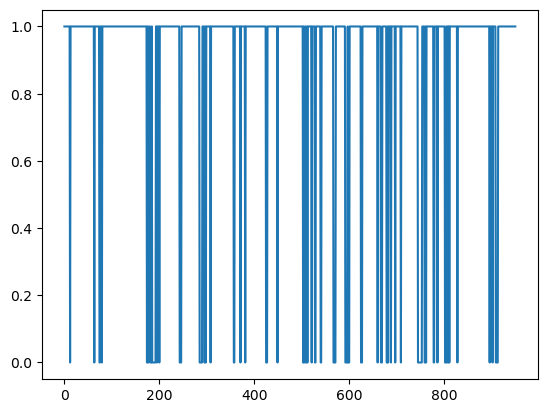

In [553]:
plt.plot(np.array(var_bound) > np.array([l.mean() for l in loss_segments])*1)

In [421]:
diff_mean = 
first = np.linalg.eigvals(df_sequential.iloc[:25].cov()@df_sequential.iloc[:25].cov().T).max()**(4/4)+np.linalg.eigvals(df_sequential.iloc[25:50].cov()@df_sequential.iloc[25:50].cov().T).max()**(4/4)
second = first*np.log(25)/25

first/(np.sqrt(10000*50))+second


(7.073606731086583+0j)

In [503]:
def prop5(x,y,p,m):
    d = x.shape[1]
    c1 =np.linalg.norm(x.mean(axis=0)-y.mean(axis=0))**2*p
    cov_x = np.cov(x.T)
    cov_y = np.cov(y.T)
    opnormx = np.max(np.linalg.eigvals(cov_x@cov_x.T))**(0.5*p/2)
    opnormy = np.max(np.linalg.eigvals(cov_y@cov_y.T))**(0.5*p/2)
    

    first = c1 + opnormx + opnormy
    first = first/np.sqrt(m*d)
    second = (opnormx+ opnormy)/x.shape[0]

    return first + second


prop5(x_cur.detach().cpu().numpy(),x_ref.detach().cpu().numpy(),4,5000)

0.025870166390987614

In [506]:
loss_segments[0].var()

0.11751214

In [471]:
x1 = x_cur.detach().cpu().numpy()

(np.linalg.eigvals(pd.DataFrame(x1).cov()@pd.DataFrame(x1).cov().T).max()**0.5)**(4/2)

29.950256599358465

In [71]:
import numpy as np
from scipy.spatial.distance import pdist

def compute_diameter_multidimensional(sample):
    """
    Computes the diameter of the support of a given multi-dimensional sample set.

    Parameters:
        sample (array-like): A 2D array where each row is a point in n-dimensional space.

    Returns:
        float: The diameter of the support.
    """
    # Ensure the sample is a NumPy array
    sample = np.array(sample)
    
    # Compute all pairwise distances
    distances = pdist(sample, metric='euclidean')
    
    # Find the maximum distance
    diameter = np.max(distances)
    
    return diameter


diam = compute_diameter_multidimensional(df_sequential.iloc[:20])
#compute_diameter_multidimensional(df_sequential.iloc[20:40])

def calc_statistic(alpha,samples):
    n= len(samples)
    diam = compute_diameter_multidimensional(samples)
    return diam*np.sqrt(np.log(2/alpha))/np.sqrt(n)*2*np.sqrt(2/n*samples.var().sum() + np.linalg.norm(samples.mean(axis=1))**2) + 2*n**(-0.5)

In [325]:
diam*np.sqrt(np.log(2/0.05))/np.sqrt(20)*2*np.sqrt(2/20*df_sequential.iloc[:20].var().sum() + np.linalg.norm(df_sequential.iloc[:20].mean(axis=1))**2) + 2*20**(-0.5)

22.109111222600795

In [330]:
calc_statistic(0.05,df_sequential.iloc[:20].to_numpy())

TypeError: calc_statistic() missing 1 required positional argument: 'p'

In [272]:
diam = np.abs(df_sequential.iloc[:20].max().max() - df_sequential.iloc[:20].min().min())
diam#*np.log(2/0.05)/25**0.5

8.111817359924316

In [266]:
diam*np.log(2/0.05)/25**0.5+2*(2/25*(df_sequential.iloc[:25]**2).mean(axis=0).sum())**0.5

9.06024897410649

In [309]:
2*20**(-0.5)

0.4472135954999579